# Test - District 5

In this notebooks I want to assert the influence of time over the number of SHSAT appliers. How does our analysis hold with time? Is it true that, if a certain year a school had a certain gap, this gap will probably continue next year?

To do so, I will measure something simple, how much does the percentage of SHSAT applicants vary over the years. We will expect some variance, yes, but, if the general trend is kept, then we can say that the gap of one year is indeed good to see what will happen the next year.

Also important to notice is that, even if this assertion is not true, measuring the gap in one year might actually be the best way of seeing how a school will perform the next year. We don't have information from the school year until after the SHSAT, and, given so, all the information we can gather is from the pst year. Maybe some time references might also be necessary, like time series modelling, blablablah ARMA oh yeah

(this is also a way to fulfill the challenge requirements to use the data)

# Data

![](../data/keep/map-harlem.png)

- Comprehend 28 schools from Central Harlem
- From 2013 to 2016
- Grades 8 and 9
- *some schools have missing information*

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv('../data/raw/D5 SHSAT Registrations and Testers.csv')
df_bak = df.copy()
print(df.shape[0], "rows")

# drop 9th grade
df = df[df['Grade level'] == 8]
print(df.shape[0], "rows after dropping 9th grade")

# preprocess columns
df['% SHSAT Testers'] = df['Number of students who took the SHSAT'] / df['Enrollment on 10/31']
df = df.drop([
    'School name',
    'Grade level',
    'Enrollment on 10/31',
    'Number of students who registered for the SHSAT',
    'Number of students who took the SHSAT',
], axis=1)

df.head()

140 rows
85 rows after dropping 9th grade


,DBN,Year of SHST,% SHSAT Testers
0,05M046,2013,0.153846
1,05M046,2014,0.073684
2,05M046,2015,0.136986
3,05M046,2016,0.142857
4,05M123,2013,0.225806


## One comparison at once

/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


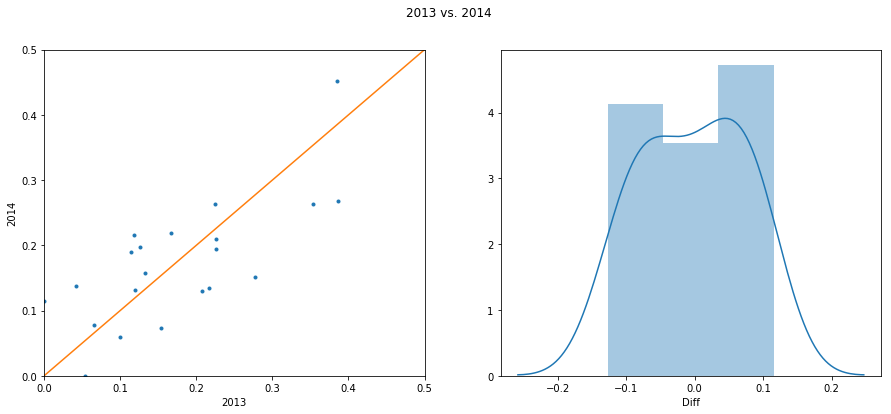

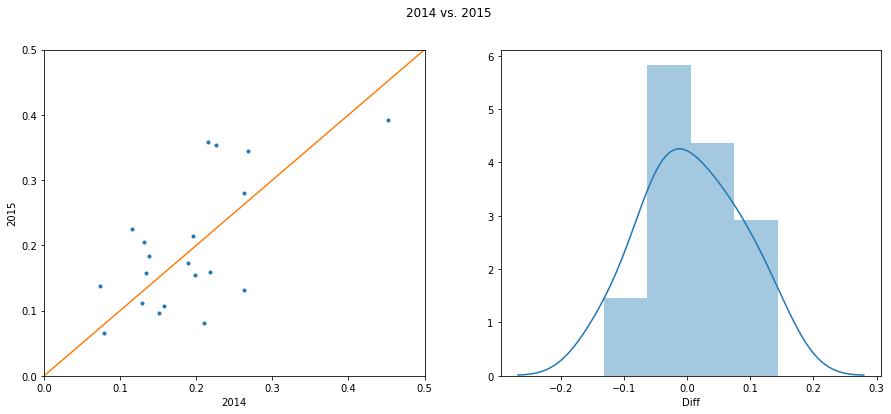

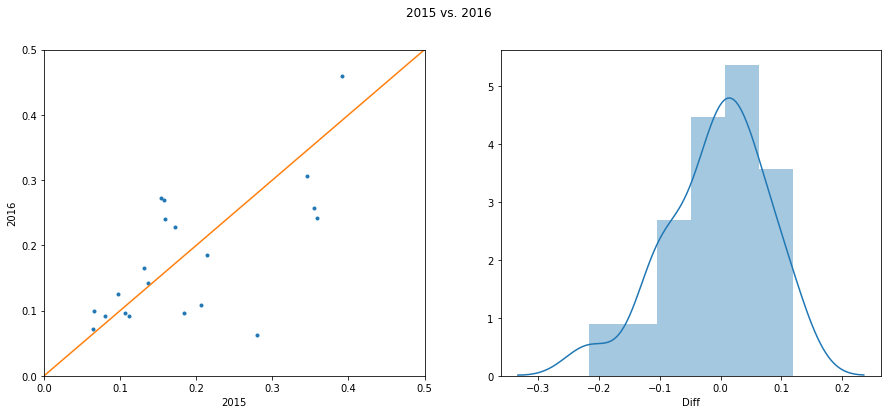

In [73]:
comparisons = [
    (2013, 2014),
    (2014, 2015),
    (2015, 2016),
]

for y1, y2 in comparisons:
    pct1 = df[df['Year of SHST'] == y1].set_index('DBN')['% SHSAT Testers']
    pct2 = df[df['Year of SHST'] == y2].set_index('DBN')['% SHSAT Testers']
    index = sorted(set(pct1.index) & set(pct2.index))
    pct1 = pct1.reindex(index)
    pct2 = pct2.reindex(index)
    diffs = pct2 - pct1

    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
    fig.suptitle('{} vs. {}'.format(y1, y2))
    
    # comparison plot
    ax1.plot(pct1, pct2, '.')
    ax1.plot([0,1],[0,1])
    ax1.set_xlim(0,0.5)
    ax1.set_ylim(0,0.5)
    ax1.set_xlabel(y1)
    ax1.set_ylabel(y2)
    
    # differences hist
    sns.distplot(diffs, ax=ax2)
    ax2.set_xlabel("Diff")

## All at the same time

In [79]:
comparisons = [
    (2013, 2014),
    (2014, 2015),
    (2015, 2016),
]


all_pct1 = np.array([])
all_pct2 = np.array([])

for y1, y2 in comparisons:
    pct1 = df[df['Year of SHST'] == y1].set_index('DBN')['% SHSAT Testers']
    pct2 = df[df['Year of SHST'] == y2].set_index('DBN')['% SHSAT Testers']
    index = sorted(set(pct1.index) & set(pct2.index))
    pct1 = pct1.reindex(index)
    pct2 = pct2.reindex(index)
    
    all_pct1 = np.hstack([all_pct1, pct1])
    all_pct2 = np.hstack([all_pct2, pct2])

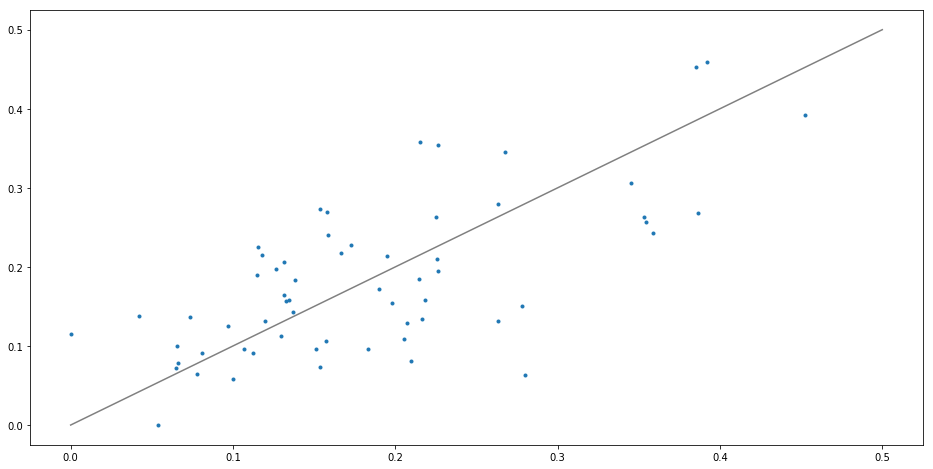

In [83]:
plt.figure(figsize=(16, 8))
plt.plot(all_pct1, all_pct2, '.')
plt.plot([0, 0.5], [0, 0.5], 'gray')

/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


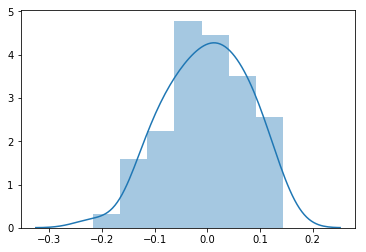

In [86]:
all_diff = all_pct2 - all_pct1
sns.distplot(all_diff);

In [95]:
pd.Series(all_diff).describe()

count    61.000000
mean     -0.001547
std       0.078140
min      -0.216709
25%      -0.054389
50%       0.007354
75%       0.063302
max       0.143106
dtype: float64

In [94]:
all_diff.mean()

-0.0015471165291402018

Schools **are** expected to have about 7% difference in applicants from one year to another. Of course, if we had more information it would be much better. But how can we predict something for next year? What change when one school gains more applicants? Is it their grades? Is it that something happened inside of it? I can't possibly know

# How is this relevant to the problem at hand?

Just a little sketch, but I believe this is very relevant. Measuring the applicants gap in one year is one thing. Predicting it in the other is a different thing. Still, we don't have information about students who are gonna perform SHSAT (only